# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

# Download Trace time-series dataset and unzip

In [ ]:
!wget http://www.timeseriesclassification.com/Downloads/Trace.zip
!unzip Trace.zip

--2022-06-15 15:48:23--  http://www.timeseriesclassification.com/Downloads/Trace.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795844 (777K) [application/zip]
Saving to: ‘Trace.zip’

Trace.zip           100%[===================>] 777.19K  1.72MB/s    in 0.4s    

2022-06-15 15:48:23 (1.72 MB/s) - ‘Trace.zip’ saved [795844/795844]

Archive:  Trace.zip
  inflating: Trace.txt               
  inflating: Trace_TEST.arff         
  inflating: Trace_TEST.txt          
  inflating: Trace_TRAIN.arff        
  inflating: Trace_TRAIN.txt         
  inflating: Trace_TEST.ts           
  inflating: Trace_TRAIN.ts          


# About the Trace Dataset

In [ ]:
trace_dataset_desc = "Trace.txt"
trace_info = open(trace_dataset_desc, "r")
for line in trace_info.readlines():
    print(line, end='')
trace_info.close()

This 4-class dataset is a subset of the Transient Classification
Benchmark (trace project), an initiative at the turn of the century
to collate data from the application domain of the process industry
(e.g. nuclear, chemical, etc.). It is a synthetic dataset designed
to simulate instrumentation failures in a nuclear power plant,
created by Davide Roverso. The full dataset consists of 16 classes,
50 instances in each class. Each instance has 4 features.

The TRACE subset only uses the second feature of class 2 and the
third feature of class 3 and 7. Hence, this dataset contains 200
instances, 50 for each class. All instances are linearly
interpolated to have the same length of 275 data points, and are
z-normalized.



Classification Error Rates (%):

Euclidean: 11.00%

DTW with 10% warping window size: 0.00%

DTW with the best (3.375%) uniform warping window size: 0.00%


# Read Trace Train dataset

In [ ]:
file_train = "Trace_TRAIN.txt"
train = pd.read_table(file_train,  sep='  ', header=None)
train.rename(columns={0: 'label'}, inplace = True)
train['label'] = train['label'].astype(int)
train

,label,1,2,3,4,5,6,7,8,9,...,266,267,268,269,270,271,272,273,274,275
0,1,0.544070,0.657863,0.611239,0.545413,0.532156,0.593013,0.595280,0.538277,0.563429,...,0.588226,0.577886,0.598069,0.583695,0.602877,0.554263,0.514147,0.603773,0.596331,0.583224
1,2,0.766430,0.624632,0.742247,0.668222,0.766118,0.730685,0.655109,0.729330,0.723651,...,0.686194,0.684996,0.654007,0.689981,0.641813,0.672799,0.616731,0.722182,0.667856,0.724446
2,4,-2.045012,-2.091677,-2.077637,-2.033517,-1.990173,-2.057709,-2.012843,-2.050970,-2.055316,...,0.555466,0.524429,0.485412,0.550532,0.597550,0.606428,0.522934,0.524287,0.547425,0.570562
3,3,-1.705022,-1.739124,-1.725659,-1.801718,-1.742543,-1.760366,-1.691572,-1.687520,-1.761512,...,0.649280,0.640694,0.625991,0.616215,0.616879,0.656518,0.595992,0.601644,0.656164,0.582259
4,1,0.541372,0.571908,0.562147,0.520951,0.527494,0.604043,0.540521,0.580383,0.500582,...,0.586000,0.626472,0.609616,0.554285,0.539465,0.533515,0.557752,0.507825,0.513768,0.528132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.606528,0.625706,0.633044,0.621388,0.609732,0.568360,0.615106,0.627838,0.611740,...,0.572225,0.658939,0.557588,0.538450,0.546571,0.554693,0.569671,0.584649,0.633834,0.558586
96,2,0.747806,0.762968,0.730123,0.680653,0.771788,0.665610,0.737680,0.762790,0.725818,...,0.751983,0.642603,0.781384,0.764494,0.741093,0.661910,0.685916,0.716611,0.678644,0.724275
97,4,-1.265726,-1.238093,-1.256923,-1.264015,-1.254037,-1.224892,-1.281235,-1.261939,-1.284487,...,0.923418,0.829264,0.875439,0.870189,0.825957,0.844655,0.845533,0.902312,0.873167,0.845766
98,1,0.674236,0.699501,0.724766,0.736954,0.678820,0.667963,0.666761,0.629702,0.618875,...,0.631834,0.630219,0.643520,0.604948,0.612756,0.605087,0.594663,0.680926,0.612721,0.650197


# Read Trace Test dataset

In [ ]:
file_test = "Trace_TEST.txt"
test = pd.read_table(file_test,  sep='  ', header=None)
test.rename(columns={0: 'label'}, inplace = True)
test['label'] = test['label'].astype(int)
test

,label,1,2,3,4,5,6,7,8,9,...,266,267,268,269,270,271,272,273,274,275
0,3,-1.296736,-1.333738,-1.349496,-1.318587,-1.307479,-1.255202,-1.273145,-1.254287,-1.298989,...,0.817590,0.851303,0.782615,0.801945,0.821274,0.810207,0.822209,0.819276,0.816343,0.794338
1,1,0.564214,0.545116,0.542047,0.563157,0.620198,0.581974,0.598603,0.578583,0.612213,...,0.568564,0.577551,0.620840,0.520834,0.568744,0.626330,0.530965,0.571332,0.586189,0.590860
2,3,-2.100779,-2.088201,-2.025100,-2.100239,-2.086126,-2.030557,-2.057606,-2.094286,-2.019413,...,0.589671,0.496224,0.537520,0.558377,0.547514,0.571221,0.542142,0.542945,0.543747,0.543874
3,2,0.738442,0.728175,0.757858,0.822484,0.734091,0.760751,0.811335,0.802686,0.728860,...,0.760828,0.709781,0.750877,0.738374,0.706462,0.769492,0.705494,0.738047,0.764293,0.757955
4,1,0.637616,0.585078,0.623133,0.629319,0.641032,0.644209,0.620274,0.629437,0.693167,...,0.619496,0.588804,0.622431,0.619396,0.637752,0.640945,0.647132,0.635257,0.621143,0.648951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,-1.371061,-1.401310,-1.360921,-1.361051,-1.399245,-1.391050,-1.395285,-1.336950,-1.379701,...,0.842057,0.793177,0.806116,0.808740,0.811363,0.749296,0.770993,0.775988,0.830288,0.800406
96,2,0.713223,0.693700,0.668581,0.709537,0.760939,0.737603,0.671763,0.652010,0.704283,...,0.625502,0.765896,0.699376,0.749527,0.610622,0.718855,0.713569,0.711667,0.722169,0.755220
97,2,0.806887,0.811921,0.807797,0.843080,0.829992,0.783205,0.812043,0.804756,0.840494,...,0.746681,0.701849,0.733755,0.752613,0.821207,0.796000,0.772949,0.761621,0.834557,0.752477
98,3,-1.934068,-1.966324,-1.951075,-1.985240,-1.952251,-1.964241,-1.997795,-1.978881,-1.874253,...,0.557510,0.571033,0.601152,0.515953,0.548378,0.577351,0.527907,0.542919,0.588434,0.534182


In [ ]:
X_train = train[train.columns[1:]].values
y_train = train['label'].values

X_test = test[test.columns[1:]].values
y_test = test['label'].values

print('X_train-shape:', X_train.shape)
print('y_train-shape:', y_train.shape)

print('X_test-shape:', X_test.shape)
print('y_test-shape:', y_test.shape)

X_train-shape: (100, 275)
y_train-shape: (100,)
X_test-shape: (100, 275)
y_test-shape: (100,)


# 1. Algorithm #1: [dist, y'] = SBD(x, y)

In [ ]:
def SBD(x_z, y_z):
    """ Computing shape-based distance measure using cross-correlation 
    and data normalization """

    len_seq = len(x_z)
    len_fft = 1 << (2 * len_seq - 1).bit_length()

    x_norm = np.linalg.norm(x_z)
    y_norm = np.linalg.norm(y_z)
    
    # denomenator for further cross-correlation computing
    denom = x_norm * y_norm
    if denom < 1e-9:
        denom = np.inf

    # individual Discrete Fourier Transforms (iDFT)
    fft_x = np.fft.fft(x_z, len_fft)
    fft_y = np.fft.fft(y_z, len_fft)

    # cross-correlation
    CC = np.real(np.fft.ifft(fft_x*np.conj(fft_y)))
    CC = np.concatenate((CC[-(len_seq-1):], CC[:len_seq]))
    CC/=denom
    
    # maximum cross-correlation
    idx = np.argmax(CC)
    val = CC[idx]
    dist = 1 - val

    # dissimilarity distance of x and y
    shift = idx - len_seq
    if shift>=0:
        y_shift = np.pad(y_z[:len_seq-shift], (shift,0), 'constant', constant_values=0)
    elif shift<0:
        y_shift = np.pad(y_z[-shift:], (0, -shift), 'constant', constant_values = 0)
    return y_shift, CC, idx, val, dist

# Sample for SBD

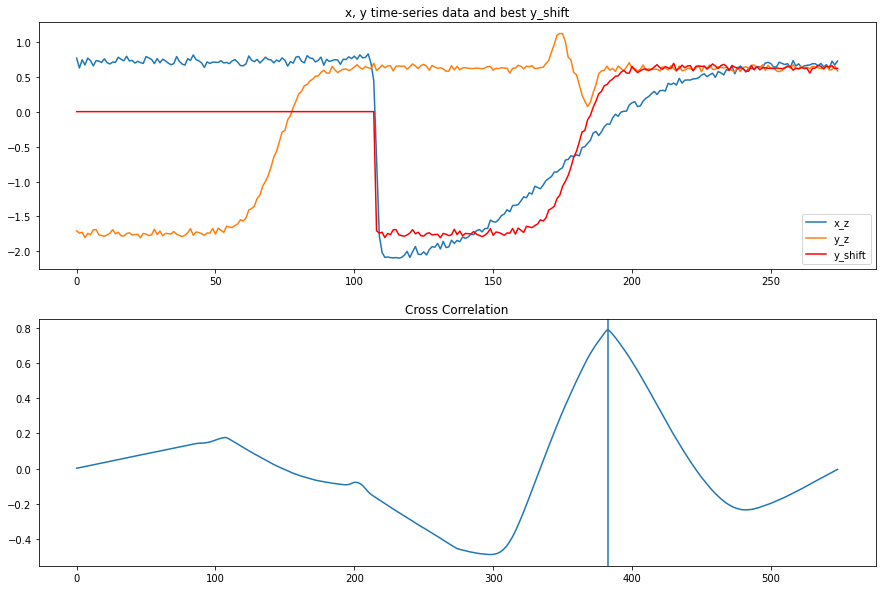

In [ ]:
x_z = X_train[1]
y_z = X_train[3]


y_shift, cc, idx, nccmax, dist = SBD(x_z, y_z)

f, axs = plt.subplots(nrows=2, figsize=(15, 10))
axs[0].plot(x_z, label='x_z')
axs[0].plot(y_z, label='y_z')
axs[0].plot(y_shift, label='y_shift', color='red')
axs[0].legend()
axs[0].set_title('x, y time-series data and best y_shift')

axs[1].plot(cc)
axs[1].set_title('Cross Correlation')
plt.axvline(x=idx)
plt.show()

# Algorithm #2: C' = ShapeExtraction(X, C)

In [ ]:
def shape_Extraction(X_z, c):
    """ Extraction of the most representative shape from the underlying data """


    n = X_z.shape[0]
    len_seq = X_z.shape[1]

    # the optimal shift
    X_shift = []
    for i in range(n):
        x_shift, _, _, nccmax, dist = SBD(c, X_z[i])
        X_shift.append(x_shift)

    X_shift = np.asarray(X_shift)

    S = np.dot(X_shift.T, X_shift)
    I = np.eye(len_seq)
    O = np.ones((len_seq, len_seq))
    Q = I - (1./len_seq)*O
    M = np.dot(np.dot(Q.T, S), Q)
    _, c_ = np.linalg.eigh(M)  # exracting eigenvectors of M

    mu_k = c_[:, -1].reshape((len_seq, ))

    dist_plus_mu = np.sum(np.linalg.norm(X_shift - mu_k, axis=1))
    dist_minus_mu = np.sum(np.linalg.norm(X_shift + mu_k, axis=1))
    if dist_minus_mu < dist_plus_mu:
        mu_k *= -1
    return zscore(mu_k)

# Sample for Shape-Extraction

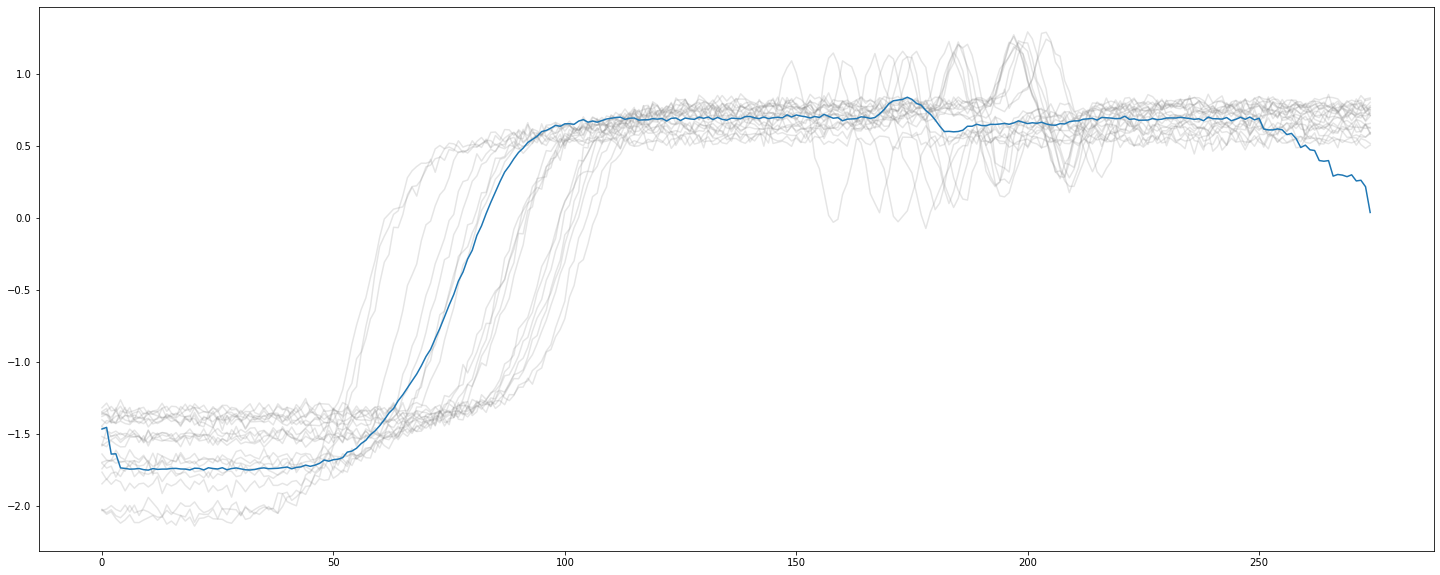

In [ ]:
ci = X_train[3]
ci = shape_Extraction(X_train[y_train==y_train[3]], ci)
plt.figure(figsize = (25, 10))
plt.plot(X_train[y_train==y_train[3]].T, color='gray', alpha = 0.2)
plt.plot(zscore(ci))
plt.show()

# Algorithm #3: K-Shape

In [ ]:
def KShape(X, k, iter = 100, seed=42):
    """ K-Shape Clustering """
    np.random.seed(seed)
    n = X.shape[0]
    seq_len = X.shape[1]

    # IDX is initialized randomly
    IDX = np.random.randint(0, k, size=n)
    indices = np.random.choice(n, k)

    for i in range(k):
        IDX[indices[i]] = i

    # initialization of matrix of centroids
    C = X_train[indices]
    
    for it in range(iter):
        print('#', end="")
        IDX_ = IDX.copy()
        
        # Refinement step
        for j in range(k):
            X_j = []
            for i in range(n):
                if IDX[i]==j:
                    X_j.append(X[i])
            X_j = np.asarray(X_j)
            if X_j.size == 0:
                seed = np.random.randint(1000)
                return KShape(X, k, iter = iter, seed=seed)
            C[j] = shape_Extraction(X_j, C[j])
        
        # Assignment step
        for i in range(n):
            mindist = np.inf
            for j in range(k):
                x_, _, _, val, dist = SBD(C[j], X[i])
                if dist < mindist:
                    mindist = dist
                    IDX[i]=j
        # print('IDX:',IDX)

        if (IDX==IDX_).all():
            return IDX, C
    return IDX, C     

# Trace time-series dataset tested with K-Shape Clustering Algorithm

In [ ]:
X_train = X_train[y_train<4]
y_train = y_train[y_train<4]

In [ ]:
IDX, C = KShape(X_train, k=3, iter=100, seed = 0)

###

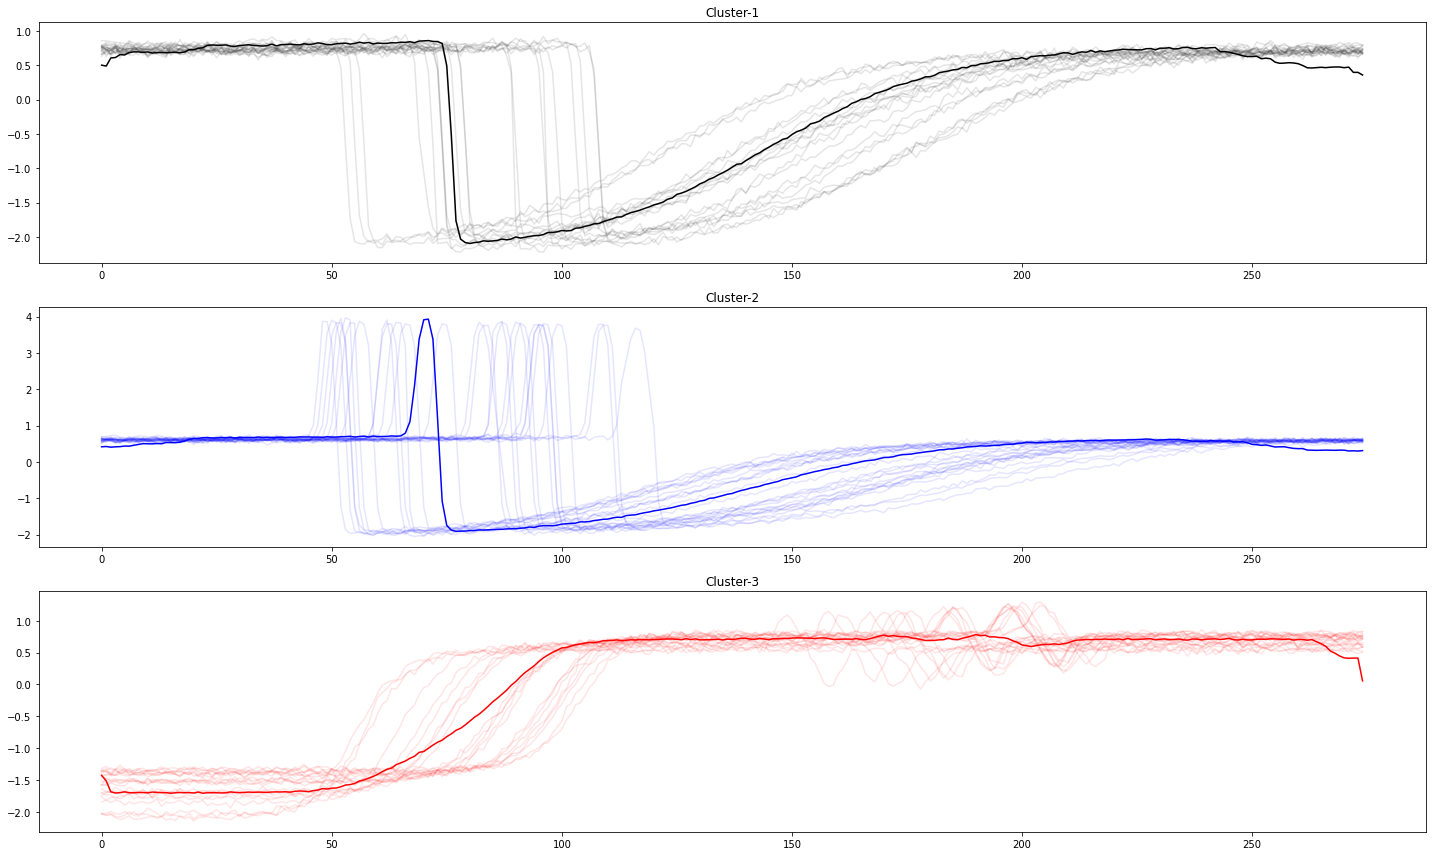

In [ ]:
fig, axs = plt.subplots(nrows = 3, figsize = (20, 12))
colors = ['black', 'blue', 'red']
for i in range(3):
    # Cluster data
    axs[i].plot(X_train[IDX==i].T, color=colors[i], alpha = 0.1)

    # Centroid 
    axs[i].plot(C[i], color=colors[i])

    # Title
    axs[i].set_title(f'Cluster-{i+1}')
    
plt.tight_layout()
plt.show()

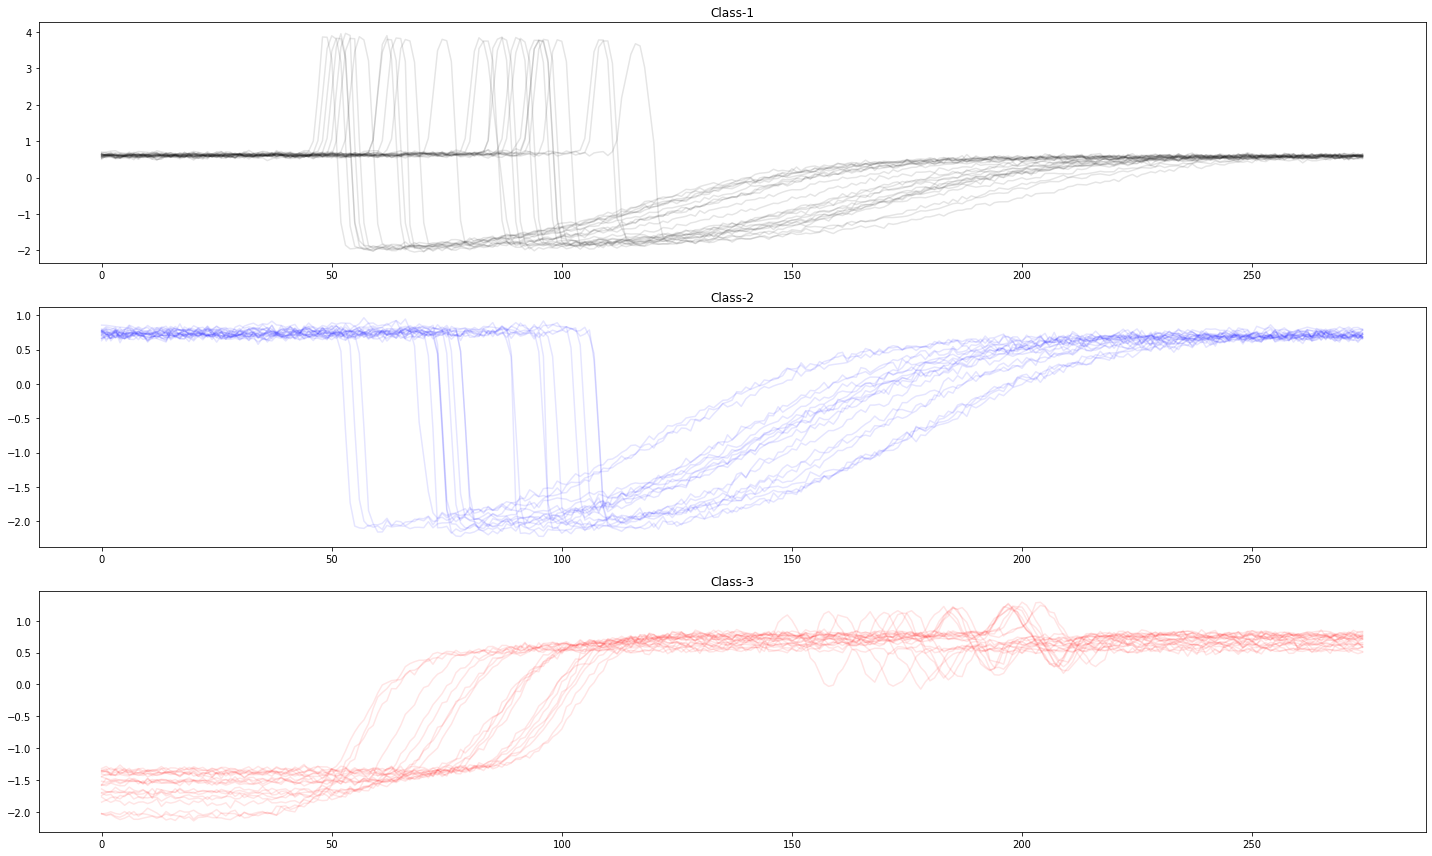

In [ ]:
fig, axs = plt.subplots(nrows = 3, figsize = (20, 12))
colors = ['black', 'blue', 'red']
for i in range(3):
    # Cluster data
    axs[i].plot(X_train[y_train==i+1].T, color=colors[i], alpha = 0.1)

    # Title
    axs[i].set_title(f'Class-{i+1}')
    
plt.tight_layout()
plt.show()

# K-Shape Time-series Clustering Algorithm is implemented in [tslearn](https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.KShape.html) libarary

## tslearn library installation

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.1 MB/s 


## import tslearn library and its functions

In [ ]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [ ]:
# For this method to operate properly, prior scaling is required
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]

In [ ]:
# kShape clustering
ks = KShape(n_clusters=3, verbose=True, random_state=0)
y_pred = ks.fit_predict(X_train)

0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 


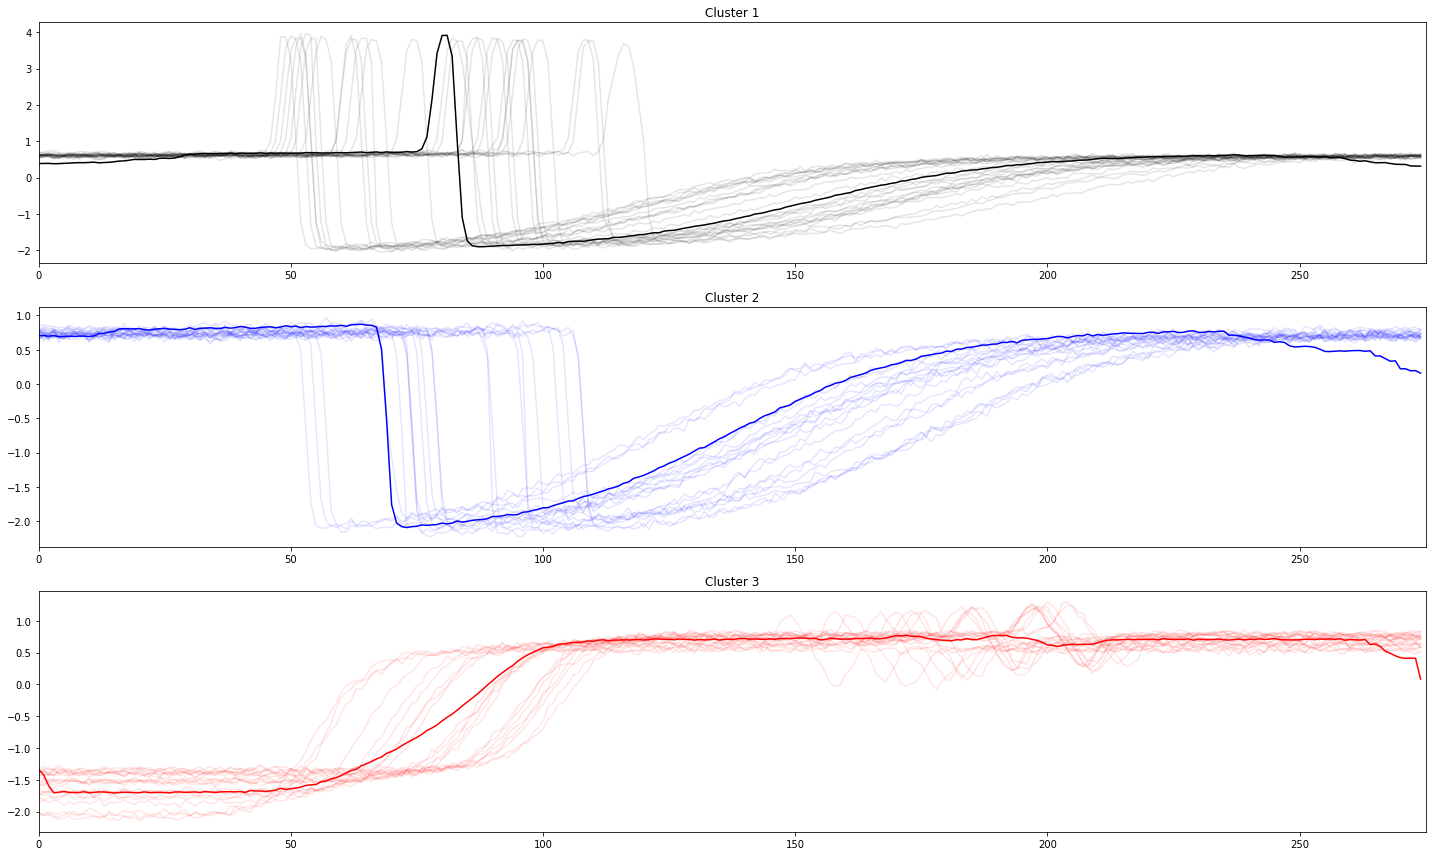

In [ ]:
plt.figure(figsize = (20, 12))
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), color=colors[yi], alpha=.1)
    plt.plot(ks.cluster_centers_[yi].ravel(), color=colors[yi],)
    plt.xlim(0, sz)

    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()